# US Mass Shootings #


Analyzing data from US mass shootings [Kaggle dataset](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years), [Mother Jones dataset](http://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)

I'm not affiliated with any organizations. Hopefully, this information will help people get insights on mass shootings and help other people.

All of the graphs and information are completely free to use, if you have any questions, please contact me at <nikolaevra@gmail.com>

## Part 1 - The Kaggle Dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.cm as colmap

MAGENTA = '#C70039'
LTBLUE = '#5DADE2'
BIG_LABEL = 15
WIDE_GRAPH = 20
TALL_GRAPH = 10
BIG_TITLE = 20
RAINBOW=colmap.rainbow(np.random.rand(20))

# Importing the dataset
dataset = pd.read_csv('processing/datasets/Mass Shootings Dataset.csv', parse_dates=["Date"], encoding = "ISO-8859-1")

dataset.iloc[115:120, :].style

,Snum,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
115,116,Mother Emanuel AME Church,"Charleston, South Carolina",2015-06-17 00:00:00,"On April 21, 2015, the man fatally shot two women and wounded three others at the Village West Apartments.",9,0,9,Unknown,White American or European American,Male,32.813,-79.9669
116,117,Miami Gardens,"Miami Gardens, Florida",2015-06-16 00:00:00,"On April 16, 2015, a man who had been in a business dispute with his two brothers shot and killed them with his mother and one of their wives before taking his own life.",0,4,4,Unknown,Black American or African American,Male,25.9433,-80.2425
117,118,Trestle Trail bridge shooting,"Menasha, Wisconsin",2015-06-11 00:00:00,"On April 7, 2015, the man entered 20 Copeland St. about 11:10 p.m. Tuesday and demanded cash from one of victim. The man then fired a handgun at the victim, killing him. Police said at least two men intended to rob people at the Copeland Street home.",3,1,4,Yes,Latino,M,nan,nan
118,119,Deer Lodge,"Deer Lodge, Montana",2015-06-07 00:00:00,"On Sunday evening of April 5, three suspects entered the apartment, fired multiple shots, and then fled the scene. Five people were injured, three of them were children. One of three suspects was arrested.",5,0,4,Unknown,White American or European American,Male,46.3976,-112.733
119,120,Cleveland,"Cleveland, Ohio",2015-05-31 00:00:00,"On April 3, 2015, four people were shot early Friday morning at a house party near Bethune-Cookman University in Daytona Beach. Four Bethune-Cookman University students were shot after the alleged gunman was kicked out of a house party about four blocks from the campus in Daytona Beach. The escaped suspect surrendered on April 6, 2015.",3,1,3,Unknown,Unknown,Male,41.4766,-81.6805


In [48]:
dataset.shape

(398, 13)

In [49]:
dataset.columns

Index([u'Snum', u'Title', u'Location', u'Date', u'Summary', u'Fatalities',
       u'Injured', u'Total victims', u'Mental Health Issues', u'Race',
       u'Gender', u'Latitude', u'Longitude'],
      dtype='object')

## Basic analytics:

In [50]:
%matplotlib inline

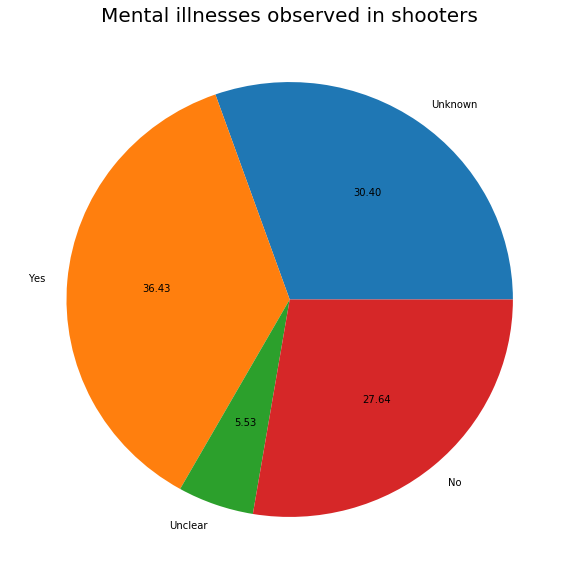

In [51]:
import matplotlib.pyplot as plt

m_illness = dataset['Mental Health Issues'].values

# categorize all of the types of illnesses
ill_dict = dict()

for item in m_illness:
    if item not in ill_dict:
        ill_dict[item] = 1
    else:
        ill_dict[item] += 1

all_illnesses = list(ill_dict.keys())
n_per_illness = list(ill_dict.values())

# plot the results
plt.figure(figsize=(10, 10))
plt.pie(n_per_illness, labels=all_illnesses, autopct='%.2f')
plt.title('Mental illnesses observed in shooters', fontsize=BIG_TITLE)
plt.show()

Judge this graph for your self, but from what I see there is no distict dominance of people with mental illnesses that have caused mass shootings, so lets move on and look for some other attributes that might help us make the classification

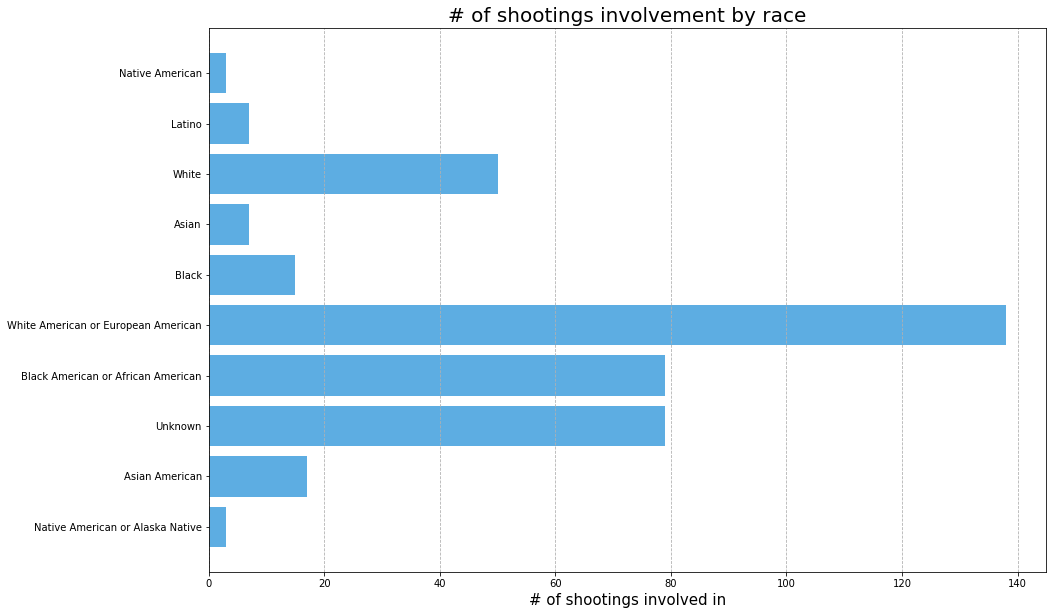

In [52]:
# categorize data to make comparisons faster
race = dataset['Race'].values

# create a dictionary to count for each category
race_dict = dict()

for item in race:
    if item not in race_dict:
        race_dict[item] = 1
    else:
        race_dict[item] += 1

races = list(race_dict.keys())
num_races = list(race_dict.values())
y_pos = np.arange(len(races))

plt.figure(figsize=(15, 10))
bars = plt.barh(y_pos, num_races, align='center', color=LTBLUE)
plt.yticks(y_pos, races)
plt.xlabel("# of shootings involved in", fontsize=BIG_LABEL)
plt.title('# of shootings involvement by race', fontsize=BIG_TITLE)
plt.grid(linestyle='dashed', axis='x')
plt.show()

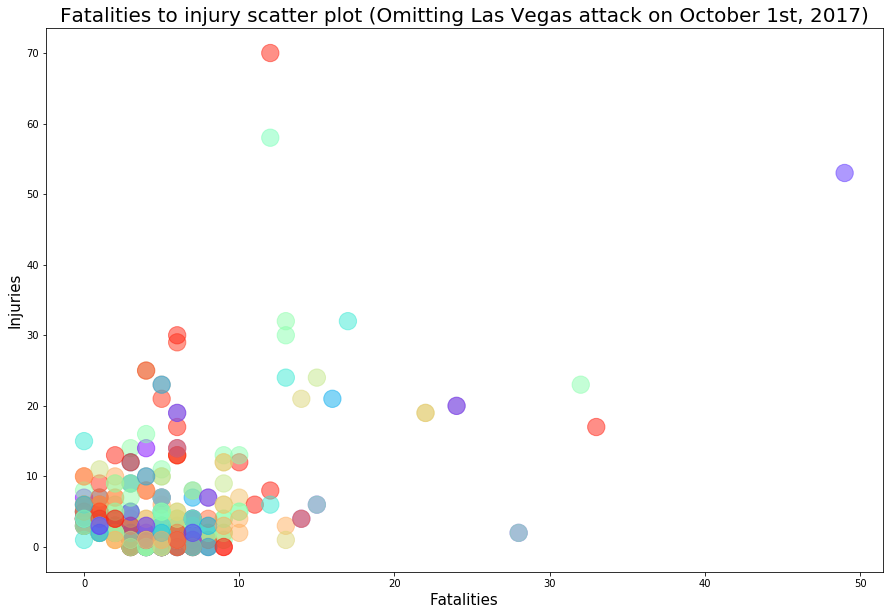

In [53]:
import colorsys as col

fatalities = dataset['Fatalities'].values
injured = dataset['Injured'].values

plt.figure(figsize=(15, 10))
plt.scatter(fatalities[1:], injured[1:], s=300, c=RAINBOW, alpha='0.5')
plt.xlabel("Fatalities", fontsize=BIG_LABEL)
plt.ylabel("Injuries", fontsize=BIG_LABEL)
plt.title("Fatalities to injury scatter plot (Omitting Las Vegas attack on October 1st, 2017)", fontsize=BIG_TITLE)
plt.show()

* the scatter plot shows the size of shooting 
**Note:** this scatter plot does not include one of the most recent shooting, the Las Vegas one

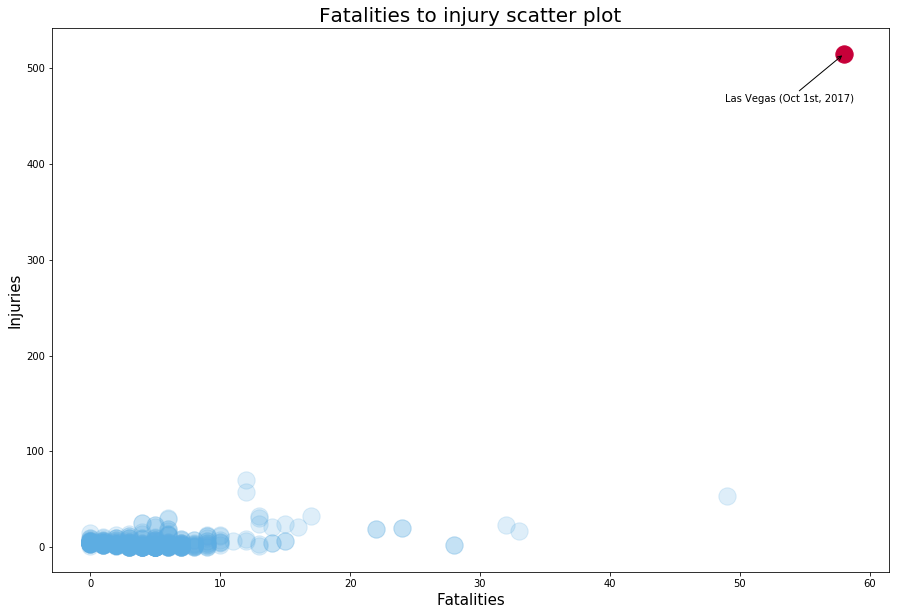

In [54]:
plt.figure(figsize=(15, 10))

# plot everything exept for the most recent one in blue
plt.scatter(fatalities[1:], injured[1:], s=300, color=LTBLUE, alpha=0.2)

# plot the most recent shooting in red
plt.scatter(fatalities[0], injured[0], s=300, c=MAGENTA, alpha=1)

# add a label for the shooting in Las Vegas
plt.annotate("Las Vegas (Oct 1st, 2017)", xy=(fatalities[0], injured[0]), xytext=(10, -50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel("Fatalities", fontsize=BIG_LABEL)
plt.ylabel("Injuries", fontsize=BIG_LABEL)
plt.title("Fatalities to injury scatter plot", fontsize=BIG_TITLE)
plt.show()

To provide the sense of scale of the Las Vegas shooting, it has been plotted in red. Right away, you notice how it surpasses any of the previous shootings in the number of Fatalities and injuries.

## Average size of shootings and variance

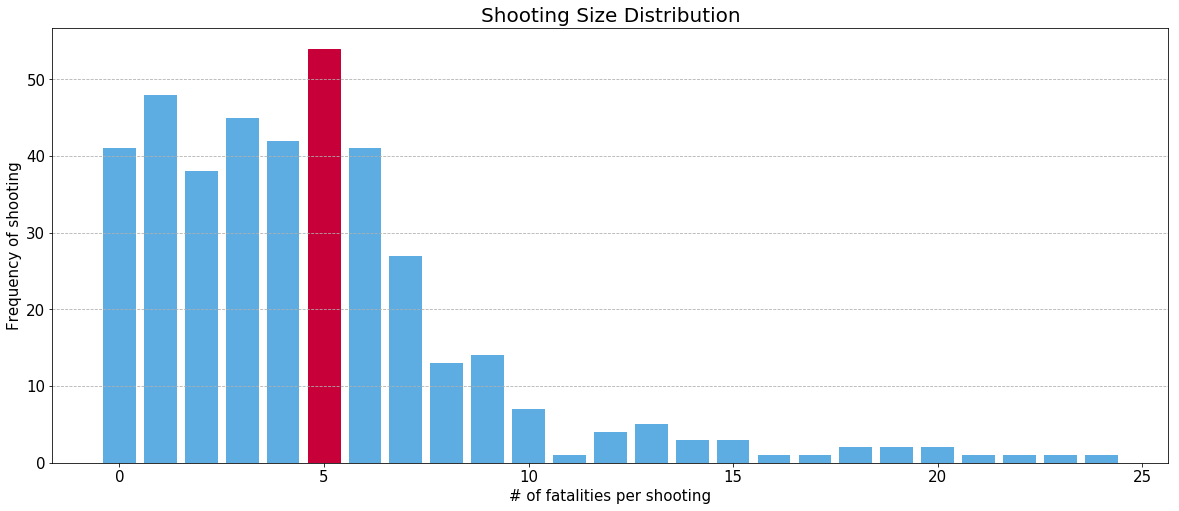

In [55]:
import collections
import statistics as s

# create a dictionary to count for each category
fatal_dict = dict()

for item in fatalities:
    if item not in fatal_dict:
        fatal_dict[item] = 1
    else:
        fatal_dict[item] += 1

# sort elements in the dictionary in increasing order
ordered_dict = collections.OrderedDict(sorted(fatal_dict.items()))

# converting dictionary into a list
deaths = list(ordered_dict.keys())
num_deaths = list(ordered_dict.values())
elem_count = np.arange(len(deaths))

# find mean and variance
mean = s.mean(fatalities)
var = s.variance(fatalities)

plt.figure(figsize=(20, 8))
bars = plt.bar(elem_count, num_deaths, align='center', color=LTBLUE)
bars[mean.astype(np.int64)].set_color(MAGENTA)

plt.xticks(fontsize=BIG_LABEL)
plt.yticks(fontsize=BIG_LABEL)
plt.ylabel("Frequency of shooting", fontsize=BIG_LABEL)
plt.xlabel("# of fatalities per shooting", fontsize=BIG_LABEL)
plt.title('Shooting Size Distribution', fontsize=BIG_TITLE)
plt.grid(linestyle='dashed', axis='y')
plt.show()

The red bar in the graph above is the average value, while all of the other statistic measurements can be found below

In [56]:
mean = s.mean(fatalities)
var = s.variance(fatalities)
mode = s.mode(fatalities)
st_dev = s.stdev(fatalities)

print('Mean: {0}\nVariance: {1}\nMode: {2}\nStandard Deviation: {3}'.format(mean, var, mode, st_dev))

Mean: 5.01507537688
Variance: 32.7403263167
Mode: 5
Standard Deviation: 5.72191631508


## Analysing dates

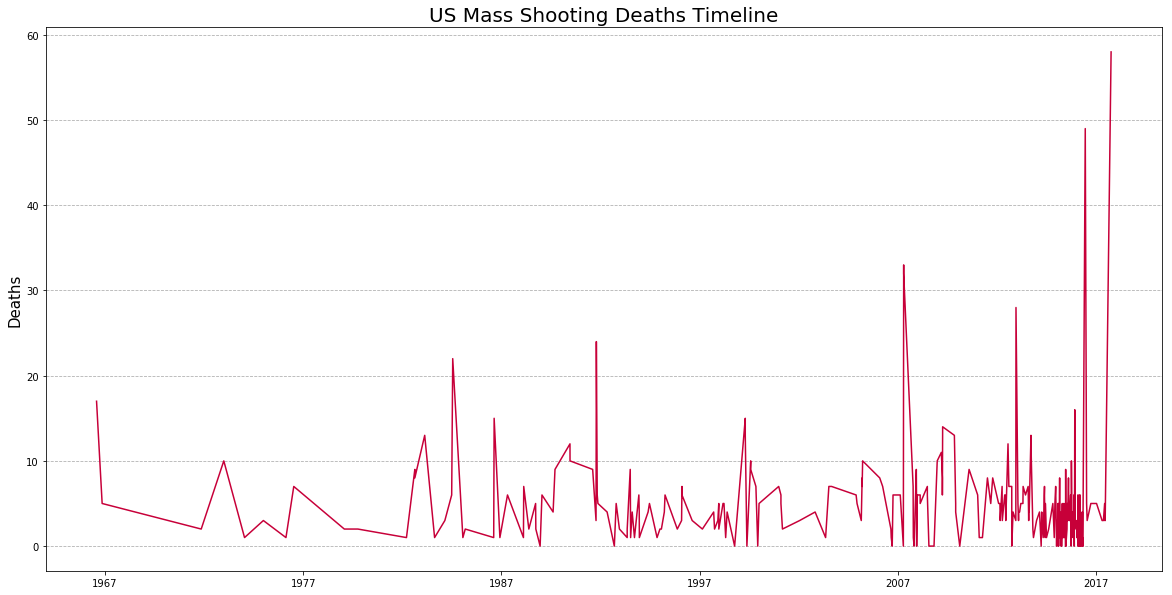

In [57]:
dates = dataset['Date']

plt.figure(figsize=(20, 10))
plt.plot_date(x=dates, y=fatalities, fmt="-", color=MAGENTA)
plt.title("US Mass Shooting Deaths Timeline", fontsize=BIG_TITLE)
plt.ylabel("Deaths", fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.show()

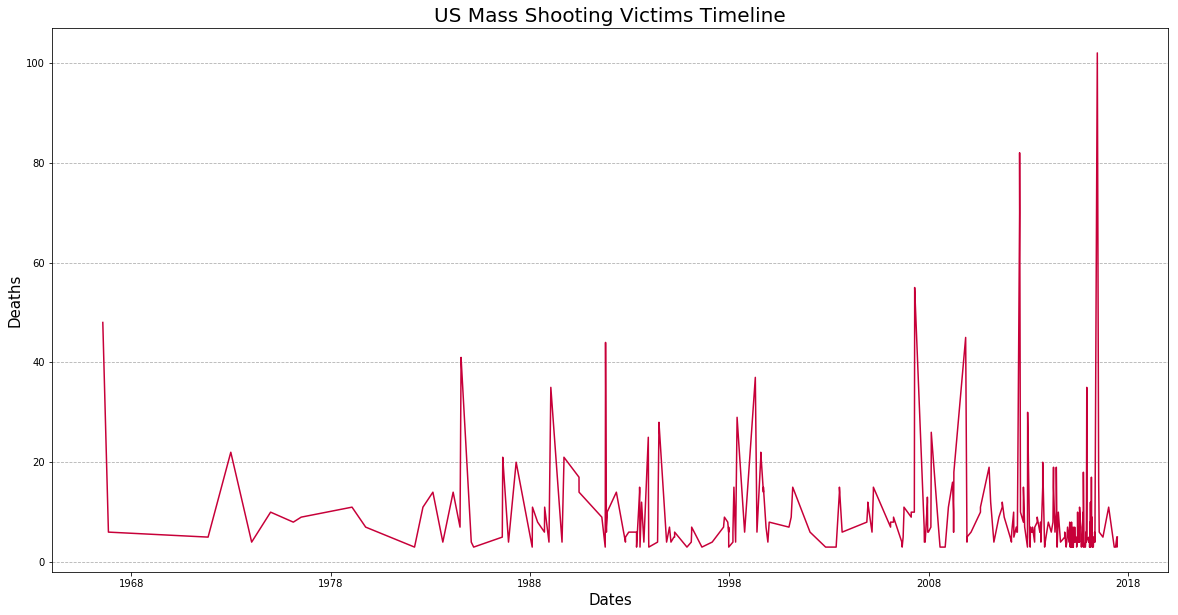

In [58]:
victims = dataset['Total victims']

plt.figure(figsize=(20, 10))
plt.plot_date(x=dates[1:], y=victims[1:], fmt="-", color=MAGENTA)
plt.title("US Mass Shooting Victims Timeline", fontsize=BIG_TITLE)
plt.ylabel("Deaths", fontsize=BIG_LABEL)
plt.xlabel("Dates", fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.show()

Looks like the frequency has increased significantly after around 2011

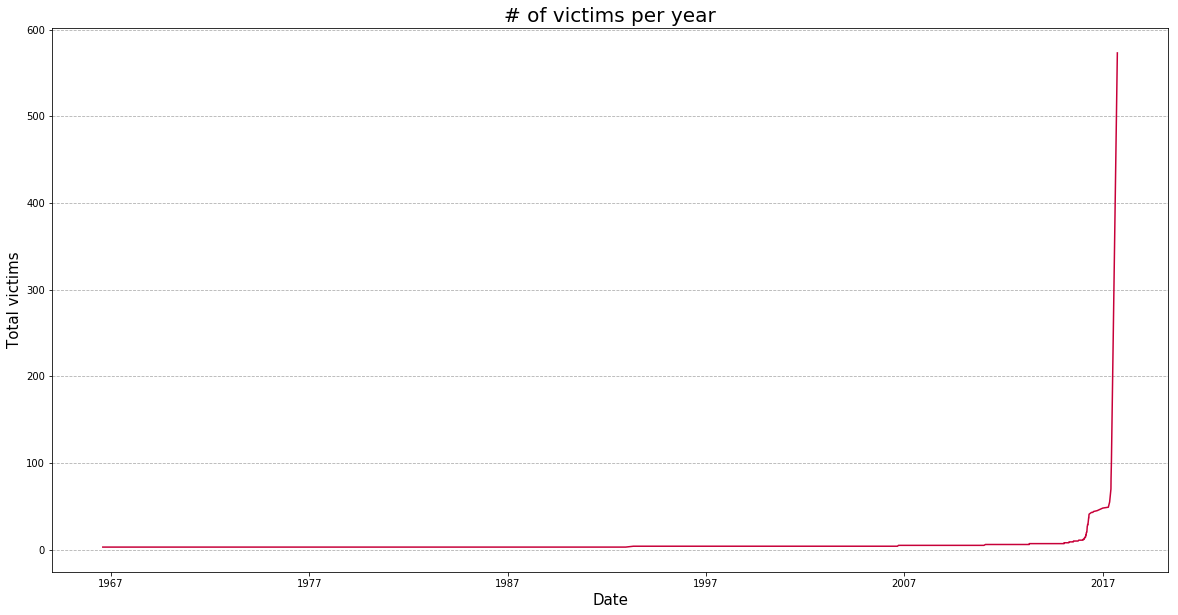

In [59]:
plt.figure(figsize=(20, 10))
plt.plot_date(np.sort(dates), np.sort(victims.values), fmt="-", color=MAGENTA)
plt.xlabel('Date', fontsize=BIG_LABEL)
plt.ylabel('Total victims', fontsize=BIG_LABEL)
plt.title('# of victims per year', fontsize=BIG_TITLE)
plt.grid(linestyle='dashed', axis='y')
plt.show()

To improve the visibility of growth, the last shooting (i.e. the Las Vegas shooting on October 1st, 2017) will be dropped.

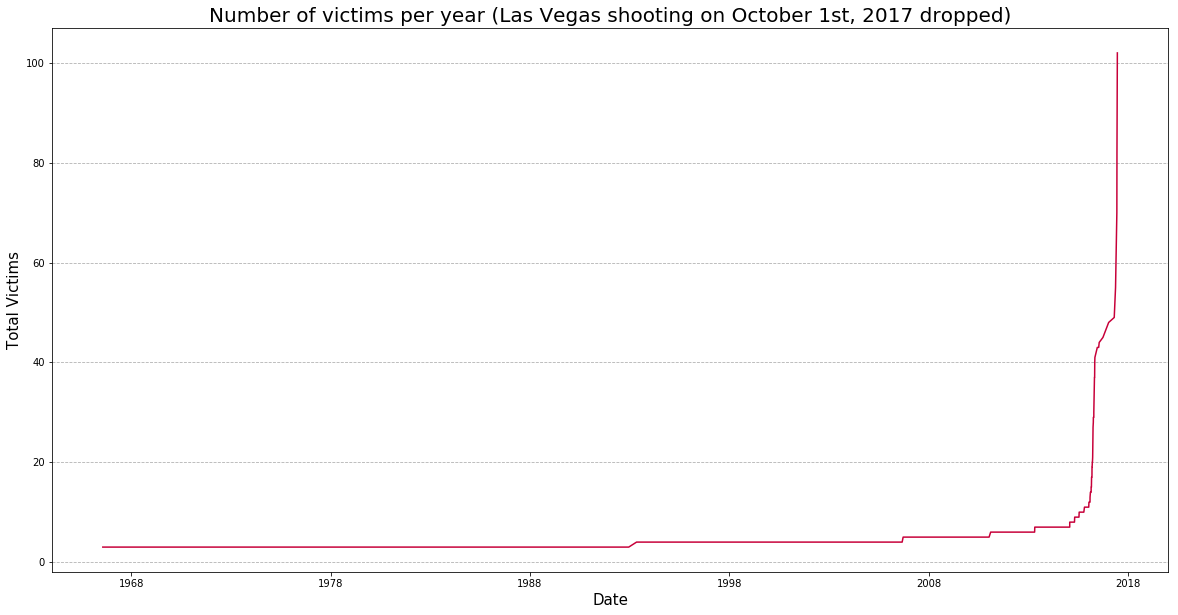

In [60]:
plt.figure(figsize=(20, 10))
plt.plot_date(np.sort(dates[1:]), np.sort(victims[1:].values), fmt="-", color=MAGENTA)
plt.xlabel('Date', fontsize=BIG_LABEL)
plt.ylabel('Total Victims', fontsize=BIG_LABEL)
plt.title('Number of victims per year (Las Vegas shooting on October 1st, 2017 dropped)', fontsize=BIG_TITLE)
plt.grid(linestyle='dashed', axis='y')
plt.show()

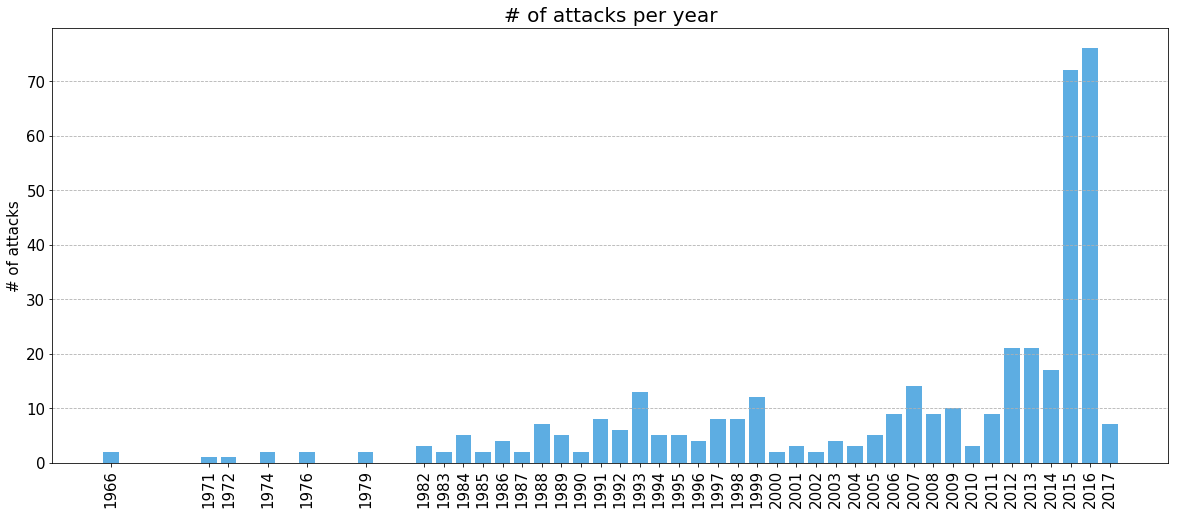

In [61]:
years = dates.dt.year

num_years = years.value_counts()
plt.figure(figsize=(20,8))
plt.bar(num_years.index, num_years.values, color=LTBLUE)
plt.xticks(num_years.index, rotation='vertical')
plt.ylabel('# of attacks', fontsize=BIG_LABEL)
plt.title('# of attacks per year', fontsize=BIG_TITLE)
plt.xticks(fontsize=BIG_LABEL)
plt.yticks(fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.show()

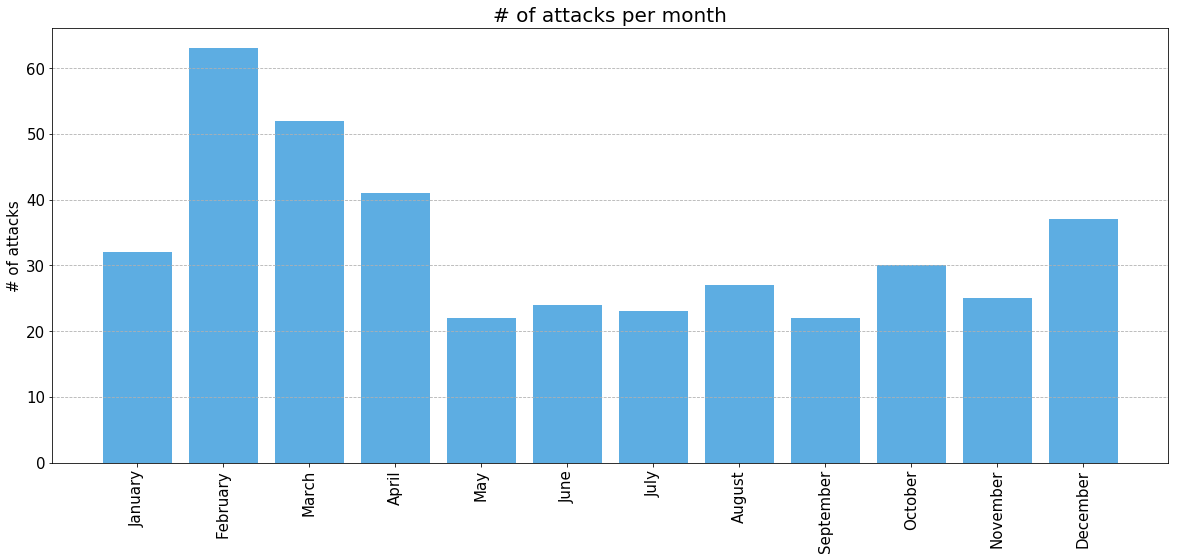

In [62]:
months = dataset['Date'].dt.month
string_months = [
    'January', 
    'February',
    'March',
    'April',
    'May',
    'June', 
    'July', 
    'August',
    'September',
    'October',
    'November',
    'December',
]

num_months = months.value_counts()
plt.figure(figsize=(20,8))
plt.bar(num_months.index, num_months.values, color=LTBLUE)
plt.xticks(range(1, 13), string_months, rotation='vertical', fontsize=BIG_LABEL)
plt.ylabel('# of attacks', fontsize=BIG_LABEL)
plt.title('# of attacks per month', fontsize=BIG_TITLE)
plt.grid(linestyle='dashed', axis='y')
plt.xticks(fontsize=BIG_LABEL)
plt.yticks(fontsize=BIG_LABEL)
plt.show()

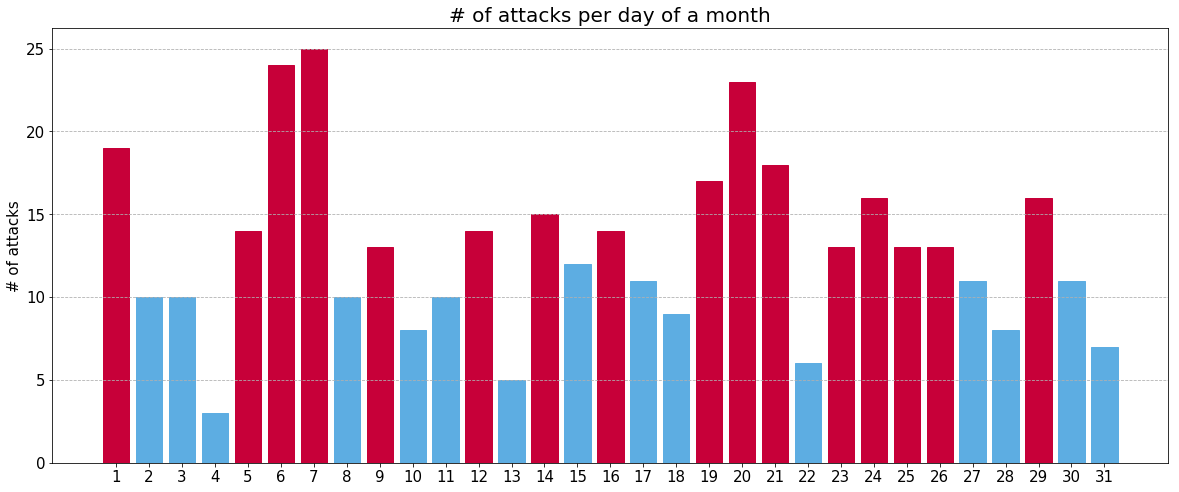

In [63]:
day_of_month = dataset['Date'].dt.day

num_day_of_month = day_of_month.value_counts()
plt.figure(figsize=(20,8))

avg = s.mean(num_day_of_month.values)
bars = plt.bar(num_day_of_month.index, num_day_of_month.values,  align='center')

for i in range(0, len(num_day_of_month)):
    if num_day_of_month.values[i] <= avg:
        color = LTBLUE
    else:
        color = MAGENTA
    
    bars[i].set_color(color)

plt.xticks(num_day_of_month.index, fontsize=BIG_LABEL)
plt.yticks(fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.ylabel('# of attacks', fontsize=BIG_LABEL)
plt.title('# of attacks per day of a month', fontsize=BIG_TITLE)
plt.show()

**NOTE:** bars in red are above the average # of attacks per day of month 

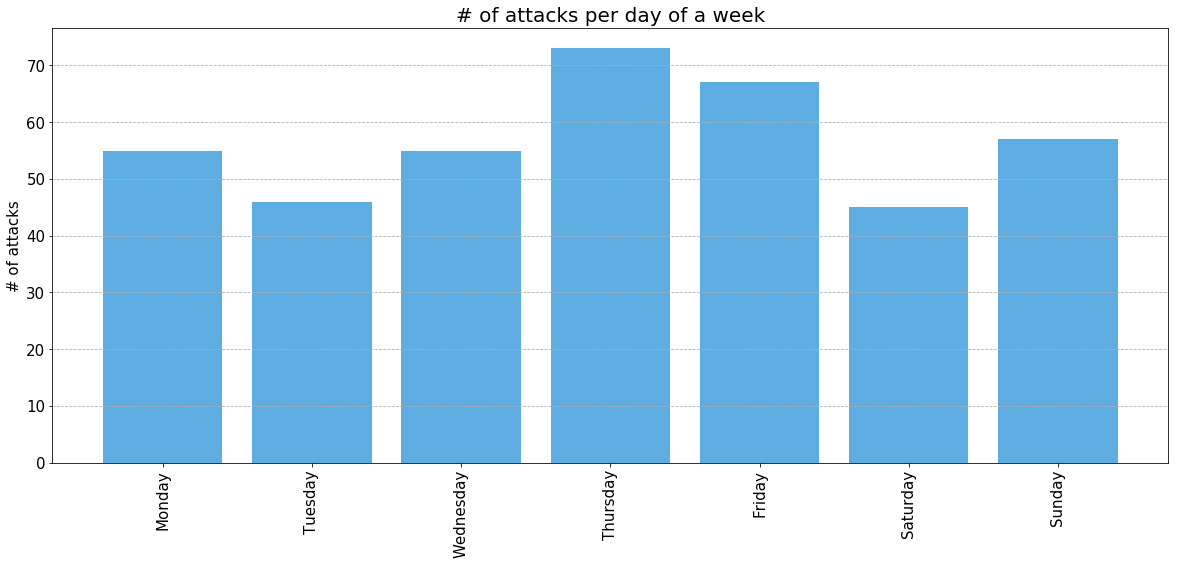

In [64]:
day_of_week = dataset['Date'].dt.dayofweek
string_dow = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]

num_day_of_week = day_of_week.value_counts()
plt.figure(figsize=(20,8))
plt.bar(num_day_of_week.index, num_day_of_week.values, color=LTBLUE)
plt.xticks(range(0, 7), string_dow, rotation='vertical', fontsize=BIG_LABEL)
plt.yticks(fontsize=BIG_LABEL)
plt.ylabel('# of attacks', fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.title('# of attacks per day of a week', fontsize=BIG_TITLE)
plt.show()

## Location based analysis

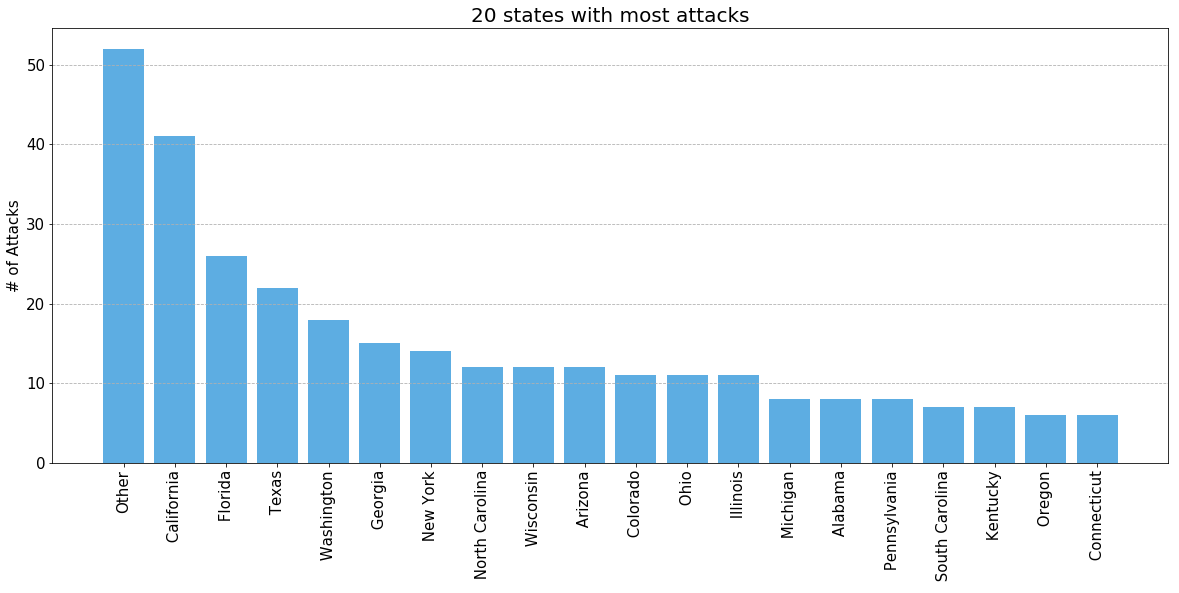

In [65]:
states = dataset['Location'].str.rpartition(',')[2]

# select only 20 states with the most attacks
top_states = states.value_counts().head(20)

state_counter = range(0, len(top_states.index))

# create a nice list of bar labels for x axis
arr_states = top_states.index.values
arr_states[0] = "Other"

plt.figure(figsize=(20, 8))
plt.bar(state_counter, top_states.values, color=LTBLUE)
plt.xticks(state_counter, arr_states, fontsize=BIG_LABEL, rotation='vertical')
plt.yticks(fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.ylabel('# of Attacks', fontsize=BIG_LABEL)
plt.title('20 states with most attacks', fontsize=BIG_TITLE)
plt.show()

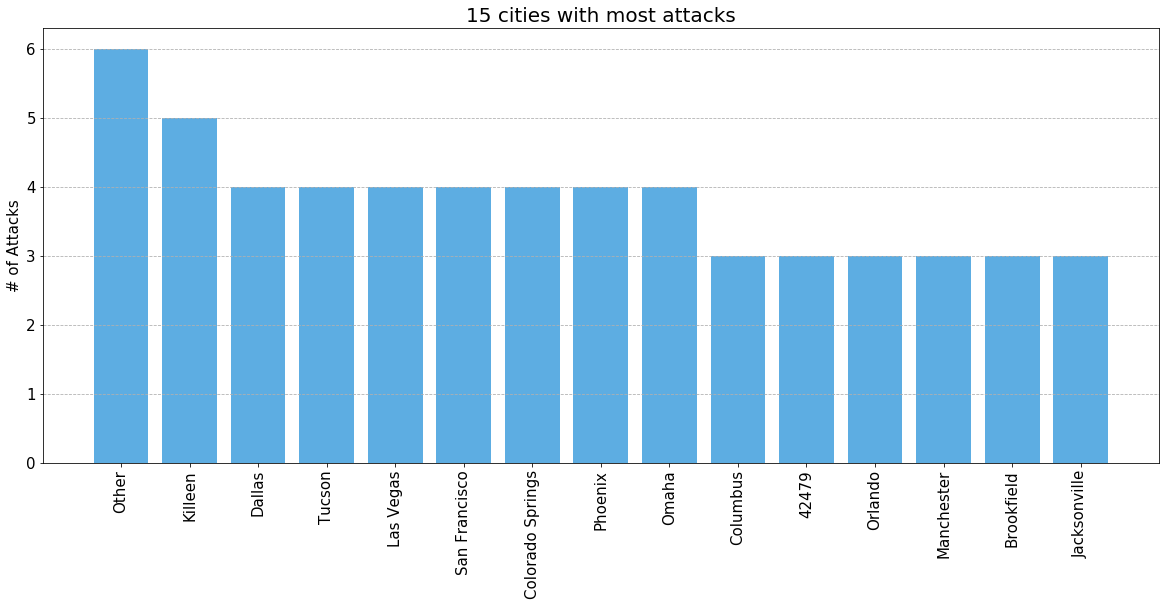

In [66]:
cities = dataset['Location'].str.rpartition(',')[0]

# select only 15 states with the most attacks
top_cities = cities.value_counts().head(15)

city_counter = range(0, len(top_cities.index))

# create a nice list of bar labels for x axis
arr_cities = top_cities.index.values
arr_cities[0] = "Other"

plt.figure(figsize=(20, 8))
plt.bar(city_counter, top_cities.values, color=LTBLUE)
plt.xticks(city_counter, arr_cities, fontsize=BIG_LABEL, rotation='vertical')
plt.yticks(fontsize=BIG_LABEL)
plt.grid(linestyle='dashed', axis='y')
plt.ylabel('# of Attacks', fontsize=BIG_LABEL)
plt.title('15 cities with most attacks', fontsize=BIG_TITLE)
plt.show()

**A heatmap was created using plotly api and generated using Python's Plotly library**

```python
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('datasets/Mass Shootings Dataset.csv')
dead = dataset.iloc[:, 4].values
lat = dataset.iloc[:, 10].values
lon = dataset.iloc[:, 11].values

import plotly.plotly as py
from plotly.graph_objs import *

for col in dataset.columns:
    dataset[col] = dataset[col].astype(str)

title = dataset['Title'] + '<br>' + \
                  'Date: ' + dataset['Date'] + ' Fatalities: ' + \
                  dataset['Fatalities'] + '<br>'

# password temporarily removed
py.sign_in('nikolaevra', '#####') 
trace1 = {
    "lat": lat,
    "lon": lon,
    "marker": {
        "cauto": True,
        "cmax": 58,
        "cmin": 0,
        "color": dead,
        "colorscale": [
            [0, "rgb(220,220,220)"], [0.2, "rgb(245,195,157)"],
            [0.4, "rgb(245,160,105)"], [1, "rgb(178,10,28)"]],
        "size": dead,
        "sizemode": "area",
        "sizeref": 0.01125,
        "sizesrc": "nikolaevra:5:f192d9",
    },
    "name": "Longitude",
    "text": title,
    "textsrc": "nikolaevra:0:8ca055",
    "type": "scattermapbox",
    "uid": "ccba03"
}
data = Data([trace1])
layout = {
    "geo": {
        "lakecolor": "rgb(255, 255, 255)",
        "projection": {"type": "mercator"},
        "scope": "usa",
        "showlakes": True
    },
    "mapbox": {
        "bearing": 0,
        "center": {
            "lat": 36.1844184699,
            "lon": -96.7380895968
        },
        "pitch": 0,
        "zoom": 2.89886008608
    },
    "title": "US Mass Shootings Geographical Heatmap<br>(Hover for "
             "breakdown)"
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)
```

In [67]:
%%HTML
<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~nikolaevra/10.embed"></iframe>

## Word map of the most frequently used words in case summary

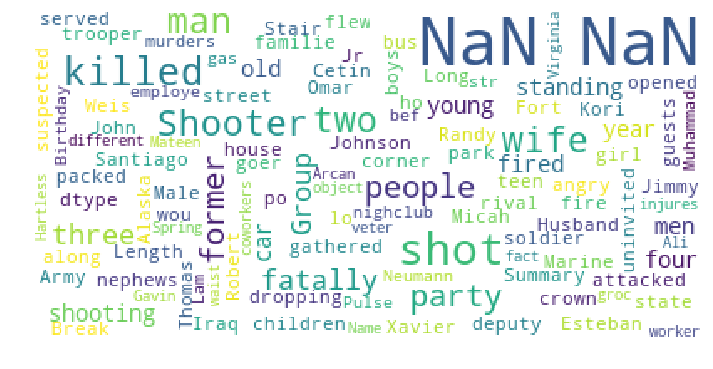

In [68]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    random_state=42
).generate(str(dataset['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()